In [1]:
import pandas as pd
import numpy as np
import matplotlib

In [2]:
repay = pd.read_csv('Repayment.csv')

In [3]:
cust = pd.read_csv('Customer Acqusition.csv')

In [4]:
spend = pd.read_csv('spend.csv')

In [5]:
repay = repay.iloc[1:1500:,0:4]

In [6]:
cust

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary
...,...,...,...,...,...,...,...,...
95,96,A96,54,CHENNAI,Silver,100000.0,C19,Salaried_Pvt
96,97,A97,58,TRIVANDRUM,Platimum,10000.0,C20,Govt
97,98,A98,51,CALCUTTA,Platimum,10001.0,C21,Normal Salary
98,99,A99,35,CALCUTTA,Platimum,10002.0,C22,Self Employed


In [7]:
spend

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07
...,...,...,...,...,...
1495,1496,A67,4-Feb-06,BUS TICKET,356872.73
1496,1497,A68,25-Mar-06,BUS TICKET,204971.10
1497,1498,A69,31-Mar-06,BUS TICKET,50449.44
1498,1499,A70,23-Mar-06,BUS TICKET,80593.94


In [60]:
df

,No,Customer,Age,City,Product,Limit,Company,Segment,Month_repay,Amount_repay,Month_spend,Type,Amount_spend,Profit,Year_spend,yearly,monthly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.0,2004-01-12,JEWELLERY,485470.0,0.0000,2004,2004,1
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.0,2004-01-03,PETRO,410556.0,0.0000,2004,2004,1
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.0,2004-01-15,CLOTHES,23740.0,6442.6110,2004,2004,1
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.0,2004-01-25,FOOD,484342.0,0.0000,2004,2004,1
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.0,2005-01-17,CAMERA,369694.0,0.0000,2005,2004,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37261,7,A7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,2004-01-03,100001.0,2006-05-03,AIR TICKET,50000.5,1450.0145,2006,2004,1
37262,7,A7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,2004-01-03,100001.0,2005-02-23,CAMERA,50000.5,1450.0145,2005,2004,1
37263,7,A7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,2004-01-03,100001.0,2004-01-12,AUTO,50000.5,1450.0145,2004,2004,1
37264,7,A7,26.0,COCHIN,Silver,100001.0,C7,Salaried_MNC,2004-01-03,100001.0,2004-01-25,TRAIN TICKET,50000.5,1450.0145,2004,2004,1


In [ ]:
repay

In [9]:
df = pd.merge(left = cust, right = repay, left_on = 'Customer', right_on = 'Customer',how = 'right', indicator = True )

In [10]:
df = pd.merge(left = df, right = spend, left_on = 'Customer', right_on = 'Customer',how = 'left', indicator = False )

In [11]:
df.columns

Index(['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company',
       'Segment', 'SL No:', 'Month_x', 'Amount_x', '_merge', 'Sl No:',
       'Month_y', 'Type', 'Amount_y'],
      dtype='object')

In [12]:
df.rename(columns = {'Month_x':'Month_repay','Amount_x':'Amount_repay','Month_y':'Month_spend','Amount_y':'Amount_spend'},inplace = True)

In [13]:
print(list(df.columns))

['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company', 'Segment', 'SL No:', 'Month_repay', 'Amount_repay', '_merge', 'Sl No:', 'Month_spend', 'Type', 'Amount_spend']


In [14]:
df = df.loc[:,['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company', 'Segment', 'Month_repay', 'Amount_repay', 'Month_spend', 'Type', 'Amount_spend']]

In [15]:
print(list(df.columns))

['No', 'Customer', 'Age', 'City', 'Product', 'Limit', 'Company', 'Segment', 'Month_repay', 'Amount_repay', 'Month_spend', 'Type', 'Amount_spend']


In [16]:
df['Amount_spend'] = df['Amount_spend'].astype('int64')
df['Amount_repay'] = df['Amount_repay'].astype('int64')

In [17]:
df.dtypes

No                int64
Customer         object
Age               int64
City             object
Product          object
Limit           float64
Company          object
Segment          object
Month_repay      object
Amount_repay      int64
Month_spend      object
Type             object
Amount_spend      int64
dtype: object

In [18]:
df['Month_repay'] = pd.to_datetime(df['Month_repay'], format = '%d-%b-%y')

In [19]:
df['Month_spend'] = pd.to_datetime(df['Month_spend'], format = '%d-%b-%y')

#####  In case age is less than 18, replace it with mean of age values

In [20]:
round(df.Age.mean(),2)

43.23

In [21]:
df['Age'] = np.where(df['Age']<18,df['Age'].mean(),df['Age'])

In [22]:
df['Age'] = np.where(df['Age']<18,df['Age'].mean(),df['Age'])

#####  b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.(customer’s limit provided in acquisition table is the per transaction limit on his card)


In [23]:
df['Amount_spend'] = np.where(df['Amount_spend'] > df['Limit'],(df['Limit'])/2,df['Amount_spend'])

#####  c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [24]:
df['Amount_repay'] = np.where(df['Amount_repay'] > df['Limit'],(df['Limit']),df['Amount_repay'])

#### 2. From the above dataset create the following summaries:
##### a. How many distinct customers exist?

In [25]:
print('Toatl distinct customer:',(-df.Customer.duplicated()).sum())

Toatl distinct customer: 100


##### b. How many distinct categories exist?

In [26]:
print('Total distinct categories:',(-df.Segment.duplicated()).sum())

Total distinct categories: 5


#####  c. What is the average monthly spend by customers?

In [27]:
print('The average monthly spend by customers:',df.Amount_spend.mean())

The average monthly spend by customers: 154103.8346482048


##### d. What is the average monthly repayment by customers?


In [28]:
print('The average monthly repayment by customers:',df.Amount_repay.mean())

The average monthly repayment by customers: 170031.40911286426


#####  e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month?

In [29]:
df['Profit'] = df['Amount_repay'] - df['Amount_spend']

In [30]:
df['Profit'] = np.where(df['Profit']>0,df['Profit']*(2.9/100),0)

In [31]:
df.groupby(by = ['Month_spend','Month_repay'])[['Profit']].sum().add_prefix('Profit for the bank for each month ').reset_index()

,Month_spend,Month_repay,Profit for the bank for each month Profit
0,2004-01-03,2004-01-03,196795.8705
1,2004-01-03,2004-01-12,153259.3160
2,2004-01-03,2004-01-15,133482.9400
3,2004-01-03,2004-01-25,109334.0600
4,2004-01-03,2004-02-05,30590.7515
...,...,...,...
5383,2006-12-03,2006-09-03,9995.5605
5384,2006-12-03,2006-10-03,1450.0290
5385,2006-12-03,2006-11-03,2660.5470
5386,2006-12-03,2006-11-21,3045.0725


#####  f. What are the top 5 product types?


In [57]:
df_top5_product_type = df.groupby('Type').Amount_spend.sum().reset_index().sort_values('Amount_spend',ascending=False)

In [59]:
df_top5_product_type.head(5)

,Type,Amount_spend
4,CAMERA,751330074.5
10,PETRO,706559019.0
7,FOOD,547242303.5
0,AIR TICKET,539769993.0
14,TRAIN TICKET,533410999.0


##### g. Which city is having maximum spend?

In [33]:
df_city_max_spend = df.groupby('City')[['Amount_spend']].max().add_prefix('City having maximum ').reset_index()


In [34]:
df_city_max_spend

,City,City having maximum Amount_spend
0,BANGALORE,486794.0
1,BOMBAY,497770.0
2,CALCUTTA,499270.0
3,CHENNAI,497368.0
4,COCHIN,494457.0
5,DELHI,468684.0
6,PATNA,496185.0
7,TRIVANDRUM,485795.0


In [35]:
df_city_max_spend.nlargest(1,'City having maximum Amount_spend')

,City,City having maximum Amount_spend
2,CALCUTTA,499270.0


#####  h. Which age group is spending more money?



In [36]:
df_Age_Max_spend = df.groupby(by='Age')[['Amount_spend']].max().add_prefix('Age group is spending more money ').reset_index()


In [37]:
df_Age_Max_spend

,Age,Age group is spending more money Amount_spend
0,19.000000,5001.0
1,21.000000,458181.0
2,24.000000,495380.0
3,25.000000,496915.0
4,26.000000,50000.5
5,27.000000,66833.0
6,28.000000,494568.0
7,29.000000,481870.0
8,31.000000,312714.0
9,32.000000,79949.0


In [38]:
df_Age_Max_spend.nlargest(1,'Age group is spending more money Amount_spend')

,Age,Age group is spending more money Amount_spend
14,37.0,499270.0


##### i. Who are the top 10 customers in terms of repayment?

In [39]:
df.nlargest(10,'Amount_spend')

,No,Customer,Age,City,Product,Limit,Company,Segment,Month_repay,Amount_repay,Month_spend,Type,Amount_spend,Profit
19725,40,A40,37.0,CALCUTTA,Platimum,500000.0,C22,Salaried_Pvt,2005-05-26,77876.0,2006-02-04,SHOPPING,499270.0,0.0
19756,40,A40,37.0,CALCUTTA,Platimum,500000.0,C22,Salaried_Pvt,2005-05-25,302665.0,2006-02-04,SHOPPING,499270.0,0.0
19787,40,A40,37.0,CALCUTTA,Platimum,500000.0,C22,Salaried_Pvt,2004-01-03,438201.0,2006-02-04,SHOPPING,499270.0,0.0
19818,40,A40,37.0,CALCUTTA,Platimum,500000.0,C22,Salaried_Pvt,2004-01-15,312510.0,2006-02-04,SHOPPING,499270.0,0.0
19849,40,A40,37.0,CALCUTTA,Platimum,500000.0,C22,Salaried_Pvt,2004-03-19,398063.0,2006-02-04,SHOPPING,499270.0,0.0
19880,40,A40,37.0,CALCUTTA,Platimum,500000.0,C22,Salaried_Pvt,2005-05-24,194880.0,2006-02-04,SHOPPING,499270.0,0.0
19911,40,A40,37.0,CALCUTTA,Platimum,500000.0,C22,Salaried_Pvt,2004-01-12,472094.0,2006-02-04,SHOPPING,499270.0,0.0
19942,40,A40,37.0,CALCUTTA,Platimum,500000.0,C22,Salaried_Pvt,2004-01-03,64718.0,2006-02-04,SHOPPING,499270.0,0.0
19973,40,A40,37.0,CALCUTTA,Platimum,500000.0,C22,Salaried_Pvt,2006-03-23,120215.0,2006-02-04,SHOPPING,499270.0,0.0
20004,40,A40,37.0,CALCUTTA,Platimum,500000.0,C22,Salaried_Pvt,2004-11-23,429769.0,2006-02-04,SHOPPING,499270.0,0.0


##### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [40]:
df['Year_spend'] = pd.DatetimeIndex(df['Month_spend']).year

In [68]:
df.head(1)

,No,Customer,Age,City,Product,Limit,Company,Segment,Month_repay,Amount_repay,Month_spend,Type,Amount_spend,Profit,Year_spend,yearly,monthly
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2004-01-03,245899.0,2004-01-12,JEWELLERY,485470.0,0.0,2004,2004,1


In [69]:
City_wise = pd.pivot_table(data = df, index = 'City', columns=['Product','Year_spend'], 
               values='Amount_spend', aggfunc='sum')

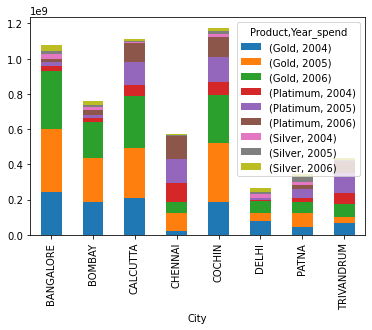

In [70]:
City_wise.plot(kind="bar", stacked = True)
plt.show()

In [42]:
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [43]:
%matplotlib inline

#### 4. Create graphs for

##### a. Monthly comparison of total spends, city wise

In [44]:
df1 = df.groupby(by = ['City','Month_spend'])[['Amount_spend']].sum().reset_index()

<AxesSubplot:xlabel='Month_spend', ylabel='Amount_spend'>

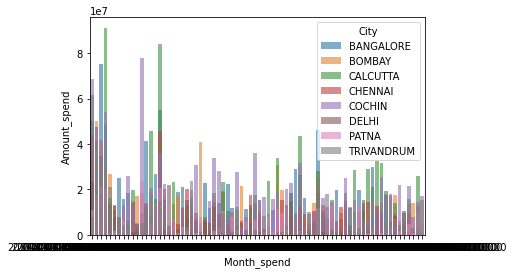

In [45]:
sns.barplot(data = df1, x = "Month_spend", y ='Amount_spend', hue = 'City', dodge = False, alpha = 0.6)

#####  b. Comparison of yearly spend on air tickets


In [46]:
df_air = df.loc[df.Type=='AIR TICKET']

In [47]:
df_air = df.groupby('Year_spend')[['Amount_spend']].sum().reset_index()

<AxesSubplot:xlabel='Year_spend', ylabel='Amount_spend'>

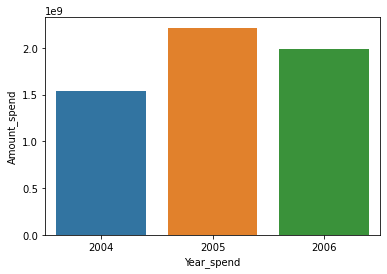

In [48]:
sns.barplot(data = df_air, x = 'Year_spend', y ='Amount_spend')

#####  c. Comparison of monthly spend for each product

In [49]:
df_Product_Month = df.groupby(by=['Month_spend','Product'])[['Amount_spend']].sum().reset_index()

<AxesSubplot:xlabel='Month_spend', ylabel='Amount_spend'>

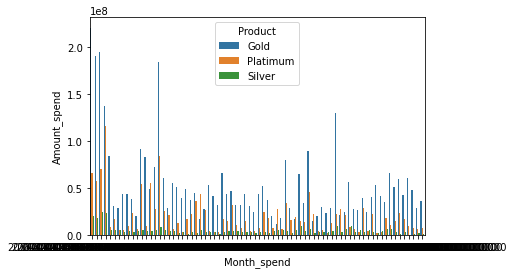

In [50]:
sns.barplot(data = df_Product_Month, x = 'Month_spend', y = 'Amount_spend', hue = 'Product')


#### 5. Write user defined PYTHON function to perform the following analysis:
##### You need to find top 10 customers for each city in terms of their repayment amount bydifferent products and by different time periods i.e. year or month. The user should be ableto specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.

In [71]:
df['yearly']=df.Month_repay.apply(lambda x:x.year)
df['monthly']=df.Month_repay.apply(lambda x:x.month)

In [83]:
def top10Customers(product_category,time_period):
    return df.loc[(df.Product == product_category)].groupby(['Customer','City','Product',time_period]).Amount_spend.sum().reset_index().sort_values('Amount_spend',ascending=False).head(10)

In [86]:
product_category=str(input("Please Enter Product Category and product category should be in Gold/Silver/Platinum: "))
time_period=str(input("Please Enter Time Period and time period should be in yearly/monthly: "))

Please Enter Product Category and product category should be in Gold/Silver/Platinum: Gold
Please Enter Time Period and time period should be in yearly/monthly: yearly


In [87]:
top10Customers_Analysis=top10Customers(product_category,time_period)

In [88]:
top10Customers_Analysis

,Customer,City,Product,yearly,Amount_spend
62,A60,CALCUTTA,Gold,2006,154292768.0
61,A60,CALCUTTA,Gold,2005,154292768.0
64,A61,COCHIN,Gold,2005,126032312.0
65,A61,COCHIN,Gold,2006,117030004.0
60,A60,CALCUTTA,Gold,2004,110209120.0
13,A13,BANGALORE,Gold,2005,107010696.0
63,A61,COCHIN,Gold,2004,99025388.0
14,A13,BANGALORE,Gold,2006,98779104.0
10,A12,BOMBAY,Gold,2005,98196456.0
55,A44,DELHI,Gold,2005,92839845.0
